## Conversion quaternion to Euler

In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import panel as pn
from math import *
import holoviews as hv
import param


https://en.wikipedia.org/wiki/Conversion_between_quaternions_and_Euler_angles

In [2]:
def QuaternionToEuler(q0,q1,q2,q3) :
    phi = atan( 2*(q0*q1+q2*q3) / (1 - 2*(q1**2 + q2**2)))
    theta =  asin( 2*(q0*q2 - q3*q1))
    psi = atan( 2* (q0*q3 + q1*q2) / (1 - 2*(q2**2 + q3**2)))
    return phi, theta, psi

In [3]:
print("Résultat en Euler : ", QuaternionToEuler(1,1,1,1))

Résultat en Euler :  (-0.9272952180016122, 0.0, -0.9272952180016122)


Création du référentiel d'Euler par rapport au référentiel cartésien 

In [4]:
def EulerToFix(phi, theta, psi, x) : 
    A =  np.zeros((3,3))
    A[0,0] = cos(psi)*cos(phi) - sin(psi)*cos(theta)*sin(phi)
    A[1,0] = sin(psi)*cos(phi) + cos(psi)*cos(theta)*sin(phi)
    A[2,0] = sin(theta)*sin(phi)
    A[0,1] = -cos(psi)*sin(phi)-sin(psi)*cos(theta)*cos(phi) 
    A[1,1] = -sin(psi)*sin(phi)+cos(psi)*cos(theta)*cos(phi)
    A[2,1] = sin(theta)*cos(phi)
    A[0,2] = sin(psi)*sin(theta)
    A[1,2] = -cos(psi)*sin(theta)
    A[2,2] = cos(theta)
    return A.dot(x)

In [18]:
def ChangeReferentiel(q0,q1,q2,q3) : 
    phi, theta, psi = QuaternionToEuler(q0,q1,q2,q3)
    print("Phi = ", phi*180/pi, "°  //  Theta (~ décalage en z) = ", theta*180/pi, "°  //  Psi (~ décalage en x) = ", psi*180/pi, "°")
    x = EulerToFix(phi,theta,psi, [1,0,0])
    y = EulerToFix(phi,theta,psi, [0,1,0])
    z = EulerToFix(phi,theta,psi, [0,0,1])

    fig = plt.figure()
    ax = plt.axes(projection ='3d')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    fig= plt.plot([0.0, x[0]], [0.0, x[1]], [0.0, x[2]], 'r', label = "x_euler")
    fig = plt.plot([0.0, y[0]], [0.0, y[1]], [0.0, y[2]], 'b', label= "y_euler")
    fig = plt.plot([0.0, z[0]], [0.0, z[1]], [0.0, z[2]], 'g', label = "z_euler")
    plt.legend()


Phi =  58.57043438516149 °  //  Theta (~ décalage en z) =  46.05448043769116 °  //  Psi (~ décalage en x) =  -58.57043438516149 °


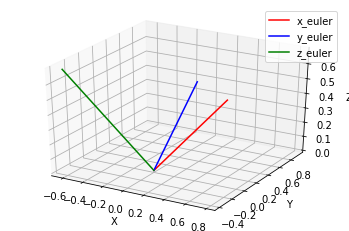

In [51]:
ChangeReferentiel(0,0.6,0.6,-0.6)

Quand seulement une valeur à 1 et le reste à zéro, le référentiel ne bouge pas. <br/>
Quand (x,x,0,0), le plan (x,y) reste à la même hauteur et pivote autour de l'axe z en fonction des valeurs données (lien encore à déterminer). <br/>
Quand (0,x,x,0), même chose que dans le premier cas mais dépendance différente. <br/>
Quand (0,0,x,x), même chose <br/>


In [ ]:
class Quaternion(param.Parameterized):
    q0 = param.Number(0.1, bounds=(-3,3))
    q1 = param.Number(0.1, bounds=(-3,3))
    q2 = param.Number(0.1, bounds=(-3,3))
    q3 = param.Number(0.1, bounds=(-3,3))

    def view(self) : 
        phi, theta, psi = QuaternionToEuler(self.q0,self.q1,self.q2,self.q3)

        x = EulerToFix(phi,theta,psi, [1,0,0])
        y = EulerToFix(phi,theta,psi, [0,1,0])
        z = EulerToFix(phi,theta,psi, [0,0,1])
        fig = plt.figure()
        ax = plt.axes(projection ='3d')
        fig = plt.plot([0.0, x[0]], [0.0, x[1]], [0.0, x[2]], 'r')
        fig = plt.plot([0.0, y[0]], [0.0, y[1]], [0.0, y[2]], 'b')
        fig = plt.plot([0.0, z[0]], [0.0, z[1]], [0.0, z[2]], 'g')
        return 

In [ ]:
result = Quaternion()
pn.Row(result.param, result.view)